In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age: the age of the patient in years.

sex: the sex of the patient (1 = male, 0 = female).

cp: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: the resting blood pressure of the patient in mm Hg.

chol: the serum cholesterol level of the patient in mg/dl.

fbs: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

restecg: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

thalach: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

oldpeak: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

ca: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

thal: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [4]:
# null values, duplicates, outliers, label encoder

In [5]:
df.isnull().sum().sum() #df.dropna(inplace=True)

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

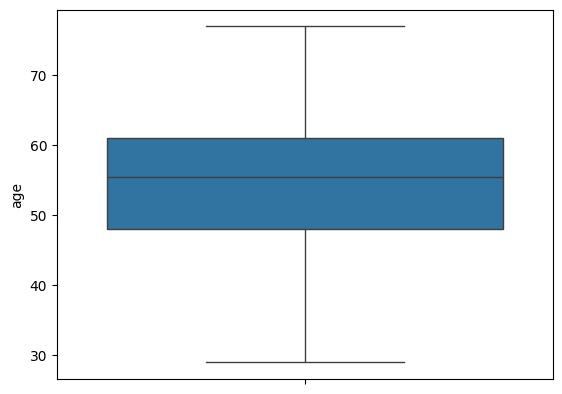

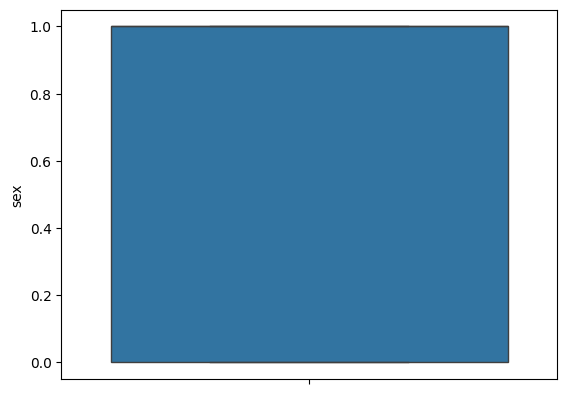

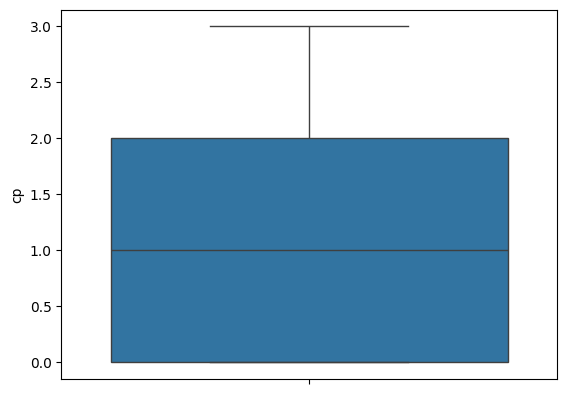

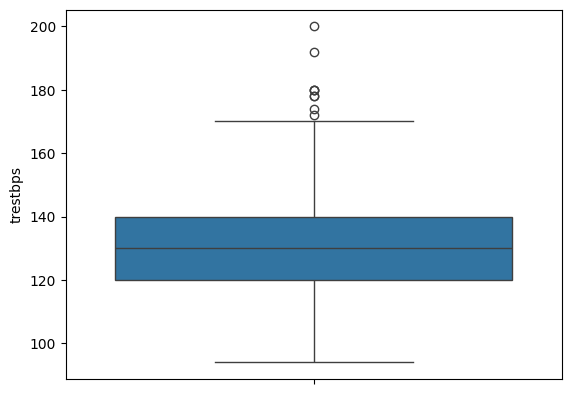

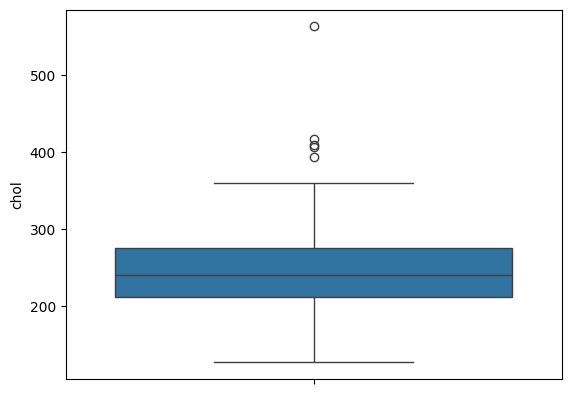

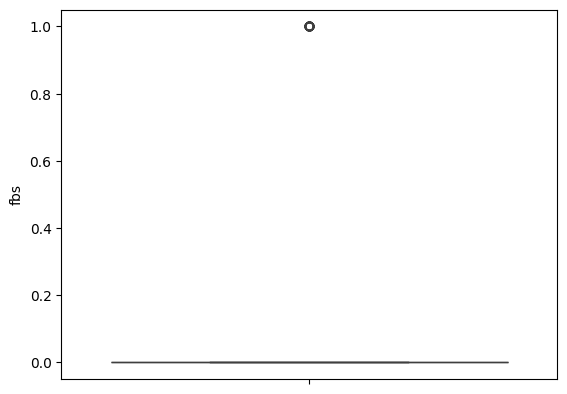

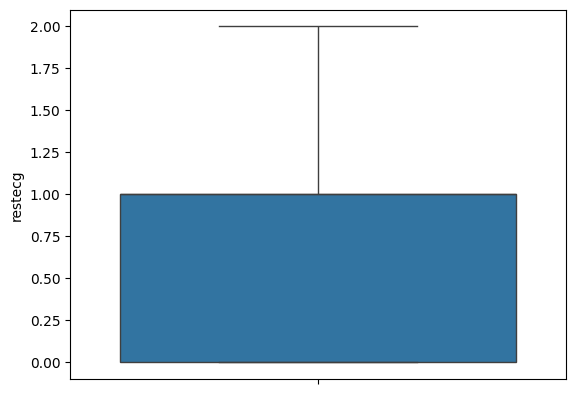

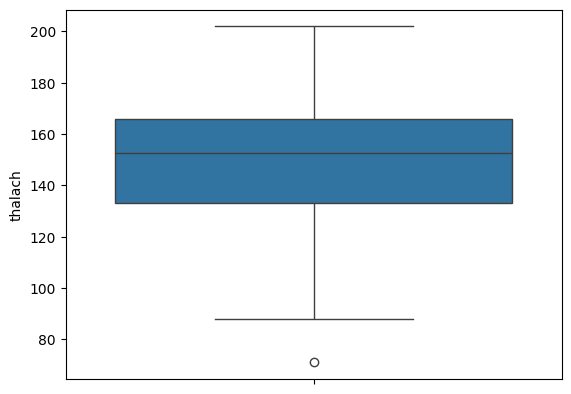

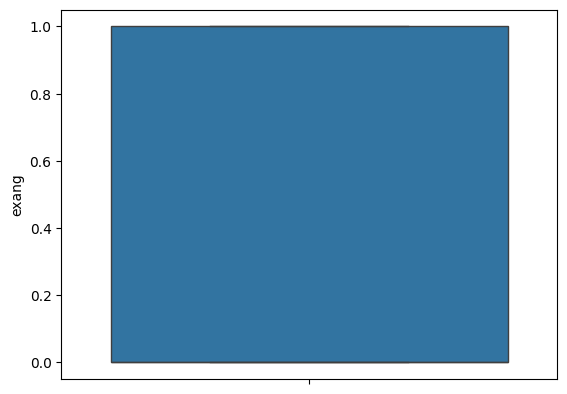

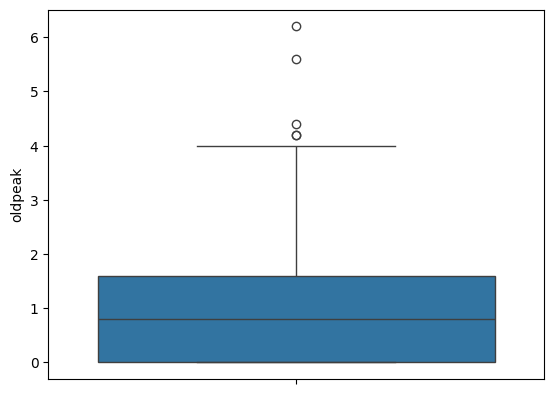

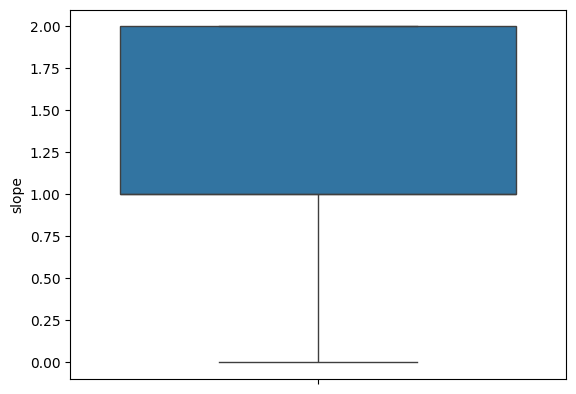

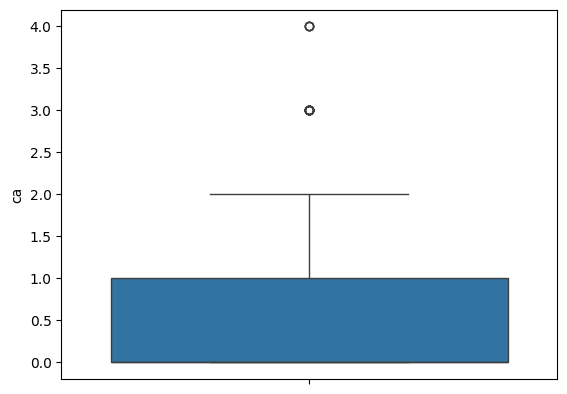

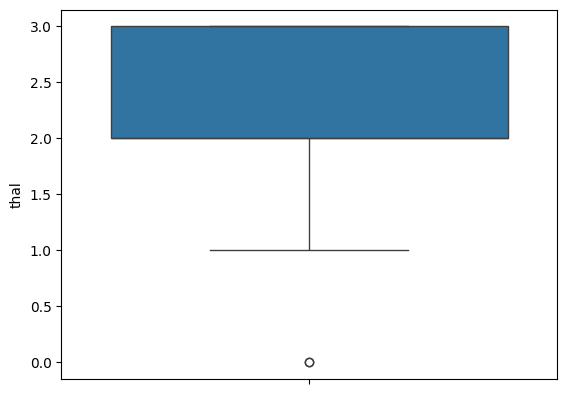

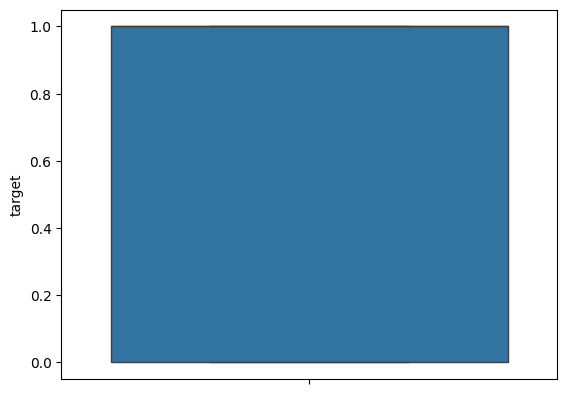

In [8]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [9]:
# We should not worry about outliers in the DT model as they get ignored while taking decision

out_col=['age','trestbps','chol','thalach','oldpeak']
for col in out_col:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3-Q1
 lower_bound = Q1 - 1.5*IQR
 upper_bound = Q3 + 1.5*IQR
 df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [10]:
# no label encoding

In [11]:
# model building
# 1. Split the data in terms of x and y
# 2. split in terms of training and testing
# 3. model initialization
# 4. train the model
# 5. prediction by model
# 6. Evaluate, accuracy
# 7. hyperparameter tuning
# 8. visualize the tree

In [12]:
x=df.drop('target',axis=1)
y=df['target']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=75)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import *

In [19]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [22]:
accuracy_score(y_test,y_pred)*100

75.29411764705883

In [21]:
confusion_matrix(y_test,y_pred)

array([[25, 16],
       [ 5, 39]])

In [26]:
(29+17)/(17+29+6+9)

0.7540983606557377

In [39]:
# Bruteforce method
depth=[1,2,3,4,5,6,7,8,9,10]
for i in depth:
  temp_model=DecisionTreeClassifier(max_depth=i)
  temp_model.fit(x_train,y_train)
  y_pred_temp=temp_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred_temp)*100
  print(f'Accuracy for depth {i} is {acc}')

Accuracy for depth 1 is 72.94117647058823
Accuracy for depth 2 is 71.76470588235294
Accuracy for depth 3 is 77.64705882352942
Accuracy for depth 4 is 76.47058823529412
Accuracy for depth 5 is 77.64705882352942
Accuracy for depth 6 is 76.47058823529412
Accuracy for depth 7 is 74.11764705882354
Accuracy for depth 8 is 75.29411764705883
Accuracy for depth 9 is 74.11764705882354
Accuracy for depth 10 is 76.47058823529412


In [37]:
# Accuracy best for depth 7

In [40]:
final_model=DecisionTreeClassifier(max_depth=8)
final_model.fit(x_train,y_train)
y_pred1=final_model.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)*100
print(acc1)

77.64705882352942


In [41]:
from sklearn.tree import plot_tree

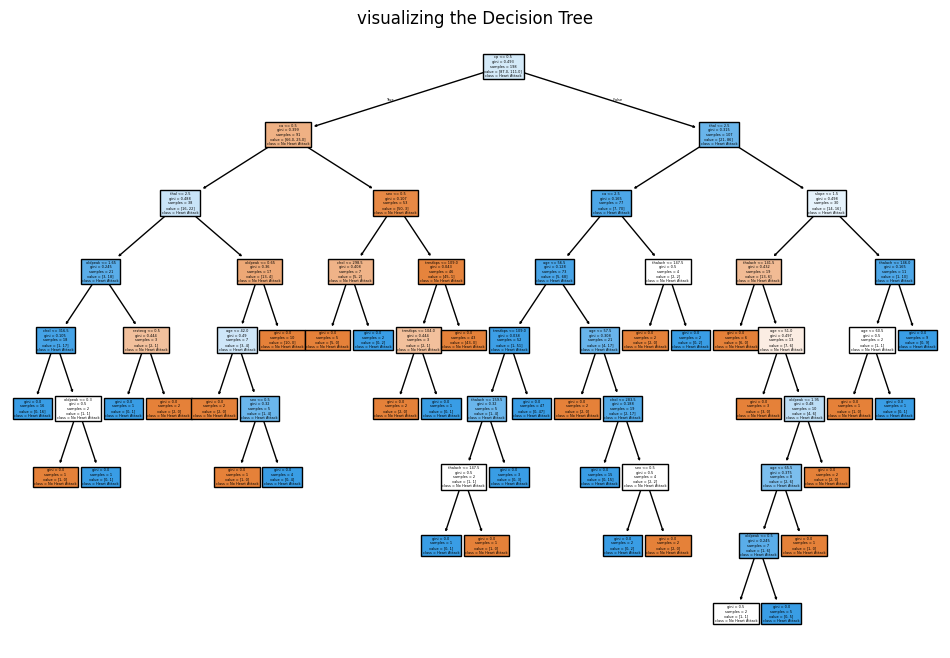

In [45]:
plt.figure(figsize=(12,8))
plot_tree(final_model,filled=True,feature_names=x.columns,class_names=['No Heart Attack','Heart Attack'])
plt.title("visualizing the Decision Tree")
plt.show()

In [46]:
# x[2] means column 2

In [48]:
# logistic on this data --> DT
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)*100
print(acc2)

78.82352941176471


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.75      0.91      0.83        47

    accuracy                           0.79        85
   macro avg       0.81      0.77      0.78        85
weighted avg       0.80      0.79      0.78        85

